# Importing the necessary libraries

In [1]:
## Visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# libraries used for mathematical operations
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from pmdarima import auto_arima
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA


from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore') 

# Import datafile

In [2]:
rainfall_df = pd.read_csv("D:\SPU APPLIED STAT\SEM IV\Project\Rainfalldf.csv")

In [3]:
rainfall_df

,INDEX,YEAR,MN,DT,MAX,MIN,AW,RF,EVP,DRNRF(hrs),...,T.1,G.1,DUR.1,T.2,G.2,DUR.2,T.3,G.3,DUR.3,Unnamed: 39
0,42744,1991,1,1,20.8,5.7,2,0.0,,0,...,,,,,,,,,,
1,42744,1991,1,2,20.2,5.7,3,0.0,,0,...,,,,,,,,,,
2,42744,1991,1,3,19.6,5.9,6,0.0,,0,...,,,,,,,,,,
3,42744,1991,1,4,21.1,7.1,6,0.0,,0,...,,,,,,,,,,
4,42744,1991,1,5,23.6,9.1,3,0.0,,0,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9303,42744,2021,11,26,30.9,17.6,,0.0,,,...,,,,,,,,,,
9304,42744,2021,11,27,32.0,18.5,,0.0,,,...,,,,,,,,,,
9305,42744,2021,11,28,32.0,18.3,,0.0,,,...,,,,,,,,,,
9306,42744,2021,11,29,31.6,18.0,,0.0,,,...,,,,,,,,,,


# Replacing blank values with the NAN

In [4]:
rainfalldata = rainfall_df.replace(r'^\s*$',float('NaN'),regex = True)

In [5]:
rainfalldata.head()

,INDEX,YEAR,MN,DT,MAX,MIN,AW,RF,EVP,DRNRF(hrs),...,T.1,G.1,DUR.1,T.2,G.2,DUR.2,T.3,G.3,DUR.3,Unnamed: 39
0,42744,1991,1,1,20.8,5.7,2,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,42744,1991,1,2,20.2,5.7,3,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,42744,1991,1,3,19.6,5.9,6,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,42744,1991,1,4,21.1,7.1,6,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42744,1991,1,5,23.6,9.1,3,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
rainfalldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9308 entries, 0 to 9307
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        9308 non-null   int64  
 1   YEAR         9308 non-null   int64  
 2   MN           9308 non-null   int64  
 3   DT           9308 non-null   int64  
 4   MAX          8958 non-null   float64
 5   MIN          8215 non-null   float64
 6   AW           3528 non-null   object 
 7   RF           8901 non-null   float64
 8   EVP          0 non-null      object 
 9   DRNRF(hrs)   6521 non-null   object 
 10  DRNRF(mnts)  6521 non-null   object 
 11  SSH          1 non-null      object 
 12  TS           0 non-null      object 
 13  N            0 non-null      object 
 14  FFF          0 non-null      object 
 15  D            0 non-null      object 
 16  TOCSQ        0 non-null      object 
 17  DU           0 non-null      object 
 18  RA           9063 non-null   object 
 19  DZ    

In [7]:
rainfalldata.isna().sum()

INDEX             0
YEAR              0
MN                0
DT                0
MAX             350
MIN            1093
AW             5780
RF              407
EVP            9308
DRNRF(hrs)     2787
DRNRF(mnts)    2787
SSH            9307
TS             9308
N              9308
FFF            9308
D              9308
TOCSQ          9308
DU             9308
RA              245
DZ              245
SN              245
SL              245
HA              245
TH              245
DS              245
FG              245
GA              245
T              9308
G              9308
DUR            9308
T.1            9308
G.1            9308
DUR.1          9308
T.2            9308
G.2            9308
DUR.2          9308
T.3            9308
G.3            9308
DUR.3          9308
Unnamed: 39    9308
dtype: int64

# Dropping the columns which are higher missing values

In [8]:
rainfalldata.drop(['INDEX','EVP','SSH','TS','N','FFF','D','TOCSQ','DU','T','G','DUR','T.1','G.1','DUR.1','T.2','G.2','DUR.2','T.3','G.3','DUR.3','Unnamed: 39'],axis = 1,inplace = True)

In [9]:
rainfalldata

,YEAR,MN,DT,MAX,MIN,AW,RF,DRNRF(hrs),DRNRF(mnts),RA,DZ,SN,SL,HA,TH,DS,FG,GA
0,1991,1,1,20.8,5.7,2,0.0,0,0,0,0,0,0,0,0,0,0,0
1,1991,1,2,20.2,5.7,3,0.0,0,0,0,0,0,0,0,0,0,0,0
2,1991,1,3,19.6,5.9,6,0.0,0,0,0,0,0,0,0,0,0,0,0
3,1991,1,4,21.1,7.1,6,0.0,0,0,0,0,0,0,0,0,0,0,0
4,1991,1,5,23.6,9.1,3,0.0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9303,2021,11,26,30.9,17.6,NaN,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0
9304,2021,11,27,32.0,18.5,NaN,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0
9305,2021,11,28,32.0,18.3,NaN,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0
9306,2021,11,29,31.6,18.0,NaN,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0


In [10]:
raindf = rainfalldata.iloc[:8241]

In [11]:
rainfalldata

,YEAR,MN,DT,MAX,MIN,AW,RF,DRNRF(hrs),DRNRF(mnts),RA,DZ,SN,SL,HA,TH,DS,FG,GA
0,1991,1,1,20.8,5.7,2,0.0,0,0,0,0,0,0,0,0,0,0,0
1,1991,1,2,20.2,5.7,3,0.0,0,0,0,0,0,0,0,0,0,0,0
2,1991,1,3,19.6,5.9,6,0.0,0,0,0,0,0,0,0,0,0,0,0
3,1991,1,4,21.1,7.1,6,0.0,0,0,0,0,0,0,0,0,0,0,0
4,1991,1,5,23.6,9.1,3,0.0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9303,2021,11,26,30.9,17.6,NaN,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0
9304,2021,11,27,32.0,18.5,NaN,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0
9305,2021,11,28,32.0,18.3,NaN,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0
9306,2021,11,29,31.6,18.0,NaN,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0


# Convert the month,day,year column in Date format

In [12]:
raindf['Date'] = pd.to_datetime(
                                      raindf['YEAR'].astype(str) + '-' + raindf['MN'].astype(str) 
                                      + '-' + raindf['DT'].astype(str) , yearfirst = True
                                    )

In [13]:
raindf.drop(['YEAR','MN','DT'],axis=1,inplace = True)

In [14]:
first_column = raindf.pop('Date')

In [15]:
raindf.insert(0, 'Date', first_column)

In [16]:
raindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8241 entries, 0 to 8240
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         8241 non-null   datetime64[ns]
 1   MAX          7891 non-null   float64       
 2   MIN          7148 non-null   float64       
 3   AW           3528 non-null   object        
 4   RF           7834 non-null   float64       
 5   DRNRF(hrs)   6521 non-null   object        
 6   DRNRF(mnts)  6521 non-null   object        
 7   RA           7996 non-null   object        
 8   DZ           7996 non-null   object        
 9   SN           7996 non-null   object        
 10  SL           7996 non-null   object        
 11  HA           7996 non-null   object        
 12  TH           7996 non-null   object        
 13  DS           7996 non-null   object        
 14  FG           7996 non-null   object        
 15  GA           7996 non-null   object        
dtypes: dat

# Filling missing values using interpolation method

In [20]:
raindf['MAX'] = raindf['MAX'].interpolate(method = 'linear')
raindf['MIN'] = raindf['MIN'].interpolate(method = 'linear')
raindf['AW'] = raindf['AW'].interpolate(method = 'linear').astype('float64')
raindf['RF'] = raindf['RF'].interpolate(method = 'linear')
raindf['DRNRF(hrs)'] = raindf['DRNRF(hrs)'].interpolate(method = 'linear').astype('float64')
raindf['DRNRF(mnts)'] = raindf['DRNRF(mnts)'].interpolate(method = 'linear').astype('float64')

# Checking missing values 

In [21]:
raindf.isna().sum()

Date             0
MAX              0
MIN              0
AW               0
RF               0
DRNRF(hrs)       0
DRNRF(mnts)      0
RA             245
DZ             245
SN             245
SL             245
HA             245
TH             245
DS             245
FG             245
GA             245
dtype: int64

# Convert the daily rainfall data into monthly

In [22]:
# Convert date column to datetime format
raindf['Date'] = pd.to_datetime(raindf['Date'])

# Group by month and sum the values
monthly_df = raindf.groupby(pd.Grouper(key='Date', freq='M')).mean()
df_month = monthly_df.fillna(monthly_df.mean())

# Reset the index
monthly_df = df_month.reset_index()

In [23]:
monthly_df.isna().sum()

Date           0
MAX            0
MIN            0
AW             0
RF             0
DRNRF(hrs)     0
DRNRF(mnts)    0
dtype: int64

Text(0, 0.5, 'MAXTemp')

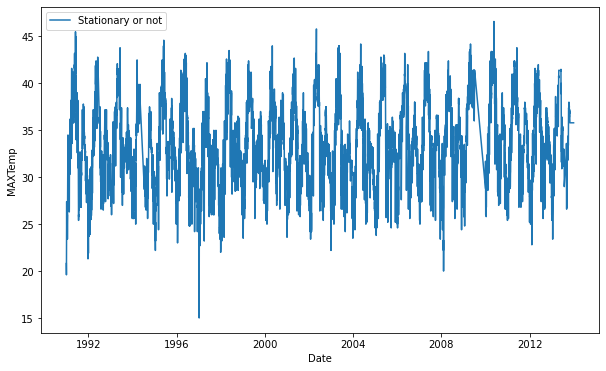

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot( x = raindf['Date'],
             y = raindf['MAX'],
             data = raindf,
             label = 'Stationary or not')
plt.xlabel('Date') 
plt.ylabel('MAXTemp')

# Fitting a model on first non-missing dataset

In [26]:
df = raindf.iloc[:8241,:5]
df

,Date,MAX,MIN,AW,RF
0,1991-01-01,20.8,5.7,2.0,0.0
1,1991-01-02,20.2,5.7,3.0,0.0
2,1991-01-03,19.6,5.9,6.0,0.0
3,1991-01-04,21.1,7.1,6.0,0.0
4,1991-01-05,23.6,9.1,3.0,0.0
...,...,...,...,...,...
8236,2013-12-27,35.8,20.6,6.0,0.0
8237,2013-12-28,35.8,20.6,6.0,0.0
8238,2013-12-29,35.8,20.6,6.0,0.0
8239,2013-12-30,35.8,20.6,6.0,0.0


In [27]:
df.index = pd.to_datetime(df.Date)

In [28]:
df_month

,MAX,MIN,AW,RF,DRNRF(hrs),DRNRF(mnts)
Date,,,,,,
1991-01-31,26.477419,11.209677,3.548387,0.000000,0.000000,0.000000
1991-02-28,30.221429,14.492857,2.714286,0.000000,0.000000,0.000000
1991-03-31,35.190323,18.651613,2.677419,0.000000,0.000000,0.000000
1991-04-30,37.896667,22.790000,3.700000,0.000000,0.000000,0.000000
1991-05-31,38.883871,25.761290,4.935484,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2013-08-31,33.467244,20.444150,3.627433,2.315404,0.256068,2.213467
2013-09-30,31.379310,25.017241,6.000000,0.000000,0.000000,0.000000
2013-10-31,36.416129,23.070968,6.000000,0.000000,0.000000,0.000000


In [29]:
df.drop(['Date'],axis=1)

,MAX,MIN,AW,RF
Date,,,,
1991-01-01,20.8,5.7,2.0,0.0
1991-01-02,20.2,5.7,3.0,0.0
1991-01-03,19.6,5.9,6.0,0.0
1991-01-04,21.1,7.1,6.0,0.0
1991-01-05,23.6,9.1,3.0,0.0
...,...,...,...,...
2013-12-27,35.8,20.6,6.0,0.0
2013-12-28,35.8,20.6,6.0,0.0
2013-12-29,35.8,20.6,6.0,0.0


# To Check Time Series is stationary or not

In [30]:
adftest = adfuller(df['RF'])
print('ADF Statistics: %f'%adftest[0])
print('P-value: %f'%adftest[1])

ADF Statistics: -13.679008
P-value: 0.000000


In [31]:
adftest2 = adfuller(df['MAX'])
print('ADF Statistics: %f'%adftest2[0])
print('P-value: %f'%adftest2[1])

ADF Statistics: -9.433468
P-value: 0.000000


In [32]:
monthly_df.index = pd.to_datetime(monthly_df.Date)

In [33]:
df1 = monthly_df['Date'].index
df1 = monthly_df['RF']

In [34]:
df2 = pd.DataFrame(df1)
df2

,RF
Date,
1991-01-31,0.000000
1991-02-28,0.000000
1991-03-31,0.000000
1991-04-30,0.000000
1991-05-31,0.000000
...,...
2013-08-31,2.315404
2013-09-30,0.000000
2013-10-31,0.000000


# Splitting the datas set into Training and Testing

In [35]:
## Training and Testing Dataset 
train_size = int(len(df2) * 0.7)  
train = df2[:train_size]
test = df2[train_size:] 

# 1) Fitting seasonal ARIMA model on train Dataset

In [35]:
# Define the seasonal ARIMA model
model12 = sm.tsa.SARIMAX(train, order=(2, 0, 2), seasonal_order=(2, 0, 2, 12))

# Fit the model
results2 = model12.fit()

# Print the summary of the model
print(results2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                 RF   No. Observations:                  193
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 12)   Log Likelihood                -505.443
Date:                            Sun, 23 Apr 2023   AIC                           1028.886
Time:                                    08:18:54   BIC                           1058.250
Sample:                                01-31-1991   HQIC                          1040.778
                                     - 01-31-2007                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1487      0.612      0.243      0.808      -1.051       1.349
ar.L2         -0.1058      0.862   

In [36]:
# Make a forecast for the next 30 days
forecast2 = results2.forecast(steps=120)
forecast2 = forecast2.clip(lower=0)

In [37]:
forecast2

2007-02-28    0.386830
2007-03-31    0.000000
2007-04-30    0.000000
2007-05-31    0.125474
2007-06-30    8.307676
                ...   
2016-09-30    3.373694
2016-10-31    0.284191
2016-11-30    0.009427
2016-12-31    0.013637
2017-01-31    0.013804
Freq: M, Name: predicted_mean, Length: 120, dtype: float64

In [38]:
# Make predictions using the fitted model on the test set
predictions = results2.predict(start=len(train), end=len(df2)-1)
predictions.clip(lower=0)

2007-02-28    0.386830
2007-03-31    0.000000
2007-04-30    0.000000
2007-05-31    0.125474
2007-06-30    8.307676
                ...   
2013-08-31    8.206628
2013-09-30    4.061486
2013-10-31    0.323434
2013-11-30    0.007649
2013-12-31    0.013620
Freq: M, Name: predicted_mean, Length: 83, dtype: float64

In [39]:
# Calculate the MAE, MSE, and RMSE
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

# Print the results
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

MAE:  1.6604717974554908
MSE:  10.390186051732464
RMSE:  3.223381152102938


# Forecasted Plot on Training dataset ( SARIMA)

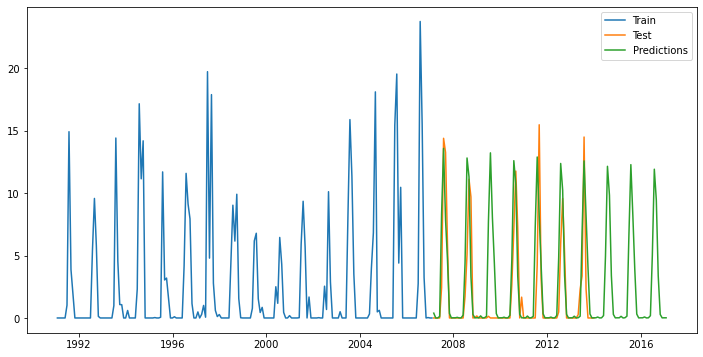

In [40]:
# Plot the actual and predicted values

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(train.index, train.values, label='Train')
ax.plot(test.index, test.values, label='Test')
ax.plot(forecast2.index, forecast2.values, label='Predictions')
ax.legend()
plt.show()

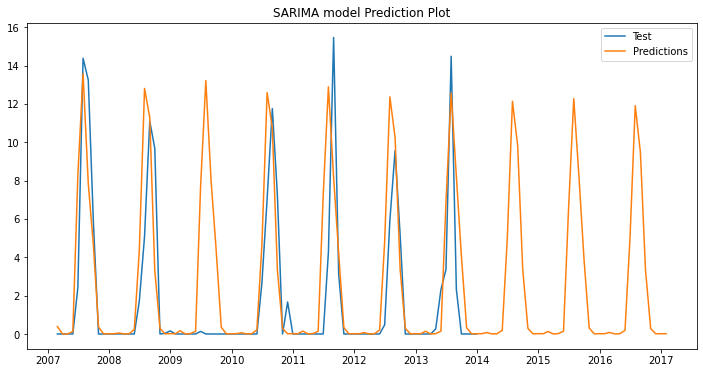

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test.index, test.values, label='Test')
ax.plot(forecast2.index, forecast2.values, label='Predictions')
ax.set_title('SARIMA model Prediction Plot')
ax.legend()
plt.show()

# Plots of Seasonal ACF and PACF

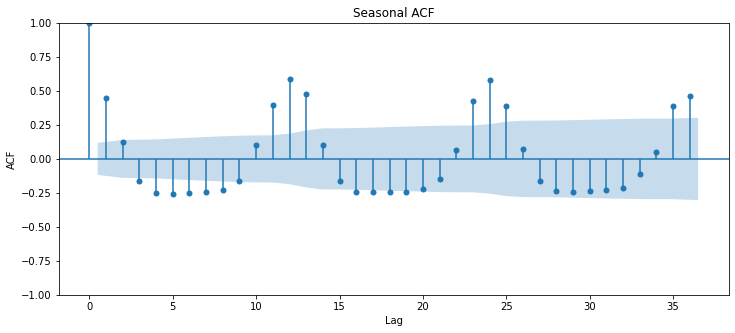

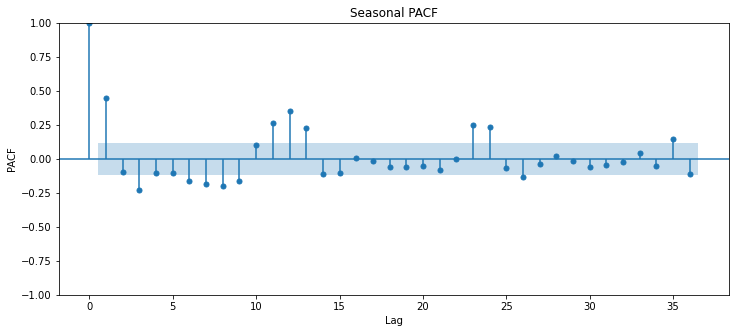

In [43]:
# Plot the seasonal ACF
fig, ax = plt.subplots(figsize=(12,5))
sm.graphics.tsa.plot_acf(df2, lags=12*3, ax=ax)
ax.set_xlabel('Lag')
ax.set_ylabel('ACF')
ax.set_title('Seasonal ACF')

# Plot the seasonal PACF
fig, ax = plt.subplots(figsize=(12,5))
sm.graphics.tsa.plot_pacf(df2, lags=12*3, ax=ax)
ax.set_xlabel('Lag')
ax.set_ylabel('PACF')
ax.set_title('Seasonal PACF')

plt.show()

# 2) Fitting auto ARIMA model

In [36]:
# Create a pandas Series with the rainfall data
rainfall = pd.Series(df_month['RF'])

# Split the data into training and testing sets
train_size = int(len(rainfall) * 0.7) # 70% for training
train_data = rainfall[:train_size]
test_data = rainfall[train_size:]

# Use the auto_arima function to fit an ARIMA model to the training data
autoarima_model = auto_arima(train_data, seasonal=False, m=12)

# Print the model summary
print(autoarima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  193
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -555.801
Date:                Tue, 25 Apr 2023   AIC                           1117.602
Time:                        09:32:48   BIC                           1127.390
Sample:                    01-31-1991   HQIC                          1121.566
                         - 01-31-2007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4254      0.819      1.740      0.082      -0.180       3.031
ar.L1          0.4202      0.070      6.044      0.000       0.284       0.556
sigma2        18.5544      1.957      9.481      0.0

In [37]:
# Make predictions using the fitted model on the test set
Apredictions = autoarima_model.predict(start=len(train_data), end=len(df2)-1)
Apredictions.clip(lower=0)

2007-02-28    1.425439
2007-03-31    2.024341
2007-04-30    2.275971
2007-05-31    2.381693
2007-06-30    2.426113
2007-07-31    2.444776
2007-08-31    2.452617
2007-09-30    2.455912
2007-10-31    2.457296
2007-11-30    2.457878
Freq: M, dtype: float64

In [114]:
test_data2

Date
2007-02-28     0.000000
2007-03-31     0.000000
2007-04-30     0.000000
2007-05-31     0.000000
2007-06-30     2.426667
2007-07-31    14.380645
2007-08-31    13.245161
2007-09-30     5.910000
2007-10-31     0.000000
2007-11-30     0.000000
Freq: M, Name: RF, dtype: float64

In [115]:
test_data2 = test_data[:'2007-11-30']

In [116]:
# Make predictions using the fitted model on the test set
predictions4 = autoarima_model.predict(start=len(train_data), end=len(df2)-1)

# Calculate the MAE, MSE, and RMSE on the test set
mae = mean_absolute_error(test_data2, Apredictions)
mse = mean_squared_error(test_data2, Apredictions)
rmse = np.sqrt(mse)

# Print the results
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

MAE:  3.9205672303747634
MSE:  29.993650215119732
RMSE:  5.4766458909737565


# Prediction Plot of Testing Dataset (Auto ARIMA)

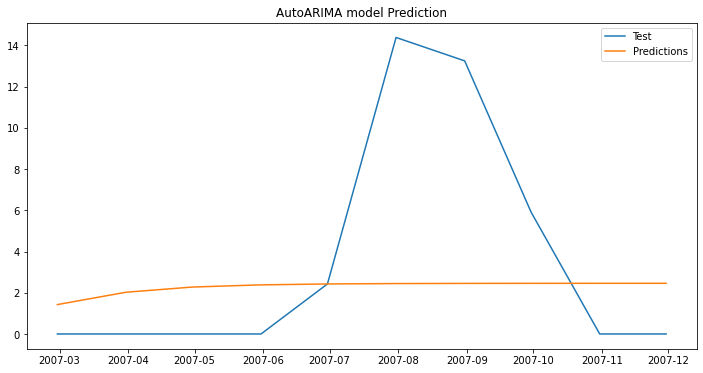

In [117]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test.index, test.values, label='Test')
ax.plot(forecasted.index, forecasted.values, label='Predictions')
ax.set_title('AutoSeasonal Prediction Plot')
ax.legend()
plt.show()

# 3) Fitting Auto Seasonal ARIMA model

In [107]:
# Create a pandas Series with the rainfall data
rainfall = pd.Series(df_month['RF'])

# Split the data into training and testing sets
train_size = int(len(rainfall) * 0.7) # 70% for training
train_data = rainfall[:train_size]
test_data = rainfall[train_size:]

# Use the auto_arima function to fit an ARIMA model to the training data
autosarima_model = auto_arima(train_data, seasonal=True, m=12)

# Print the model summary
print(autosarima_model.summary())

                                   SARIMAX Results                                   
Dep. Variable:                             y   No. Observations:                  193
Model:             SARIMAX(2, 0, [1, 2], 12)   Log Likelihood                -507.958
Date:                       Sun, 23 Apr 2023   AIC                           1027.916
Time:                               08:32:53   BIC                           1047.492
Sample:                           01-31-1991   HQIC                          1035.843
                                - 01-31-2007                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0391      0.069      0.566      0.572      -0.096       0.175
ar.S.L12       0.1558      0.194      0.804      0.421      -0.224       0.

In [108]:
# Make forecasts for the next 12 months
forecasted = autosarima_model.predict(n_periods=120)
forecasted

2007-02-28    0.216356
2007-03-31    0.161911
2007-04-30    0.189698
2007-05-31    0.321930
2007-06-30    7.257891
                ...   
2016-09-30    3.818416
2016-10-31    0.675763
2016-11-30    0.324264
2016-12-31    0.333020
2017-01-31    0.338150
Freq: M, Length: 120, dtype: float64

In [109]:
# Make predictions using the fitted model on the test set
ASpredictions = autosarima_model.predict(start=len(train_data), end=len(df2)-1)
ASpredictions.clip(lower=0)

2007-02-28     0.216356
2007-03-31     0.161911
2007-04-30     0.189698
2007-05-31     0.321930
2007-06-30     7.257891
2007-07-31    12.402133
2007-08-31     8.075940
2007-09-30     4.507010
2007-10-31     0.568296
2007-11-30     0.155051
Freq: M, dtype: float64

In [110]:
test_data2 = test_data[:'2007-11-30']

In [89]:
# Calculate the MAE, MSE, and RMSE
mae = mean_absolute_error(test_data2, ASpredictions)
mse = mean_squared_error(test_data2, ASpredictions)
rmse = np.sqrt(mse)

# Print the results
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

MAE:  1.4995189656963286
MSE:  5.650412267296914
RMSE:  2.377059584296724


# Prediction Plot of Training and Testing Datasset (Auto SARIMA)

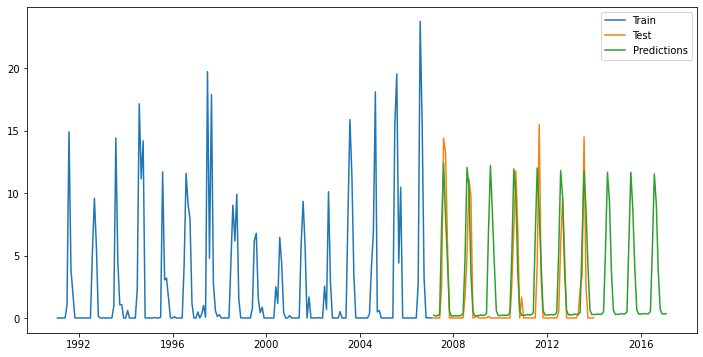

In [90]:
# Plot the actual and predicted values

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(train.index, train.values, label='Train')
ax.plot(test.index, test.values, label='Test')
ax.plot(forecasted.index, forecasted.values, label='Predictions')
ax.legend()
plt.show()

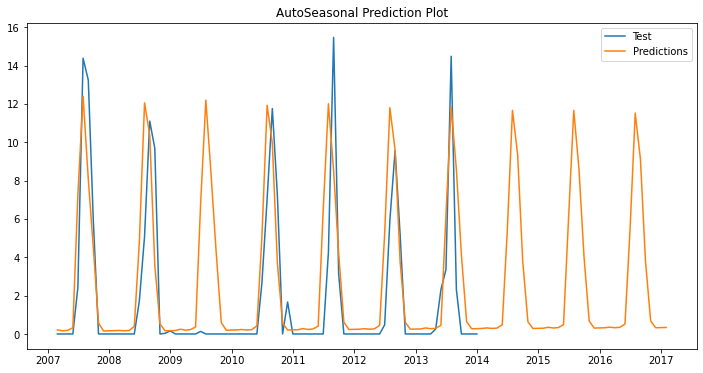

In [111]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test.index, test.values, label='Test')
ax.plot(forecasted.index, forecasted.values, label='Predictions')
ax.set_title('AutoSeasonal Prediction Plot')
ax.legend()
plt.show()

In [47]:
# Make predictions on the test data
forecast = autoarima_model.predict(n_periods=len(test_data))

# Calculate the RMSE
rmse = np.sqrt(np.mean((forecast - test_data)**2))

# Print the RMSE
print('RMSE:', rmse)

RMSE: 3.0488405515288726


# ACF and PACF Plots to check the parameters p,d,q

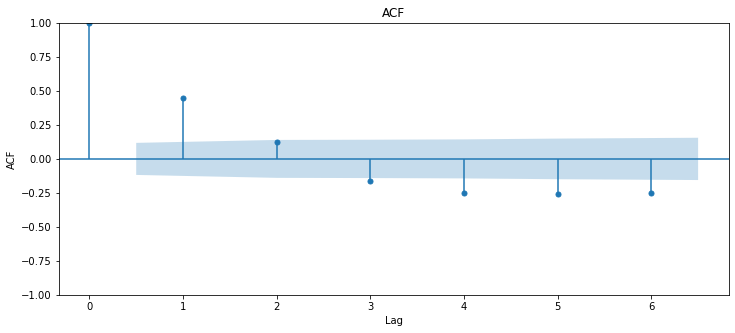

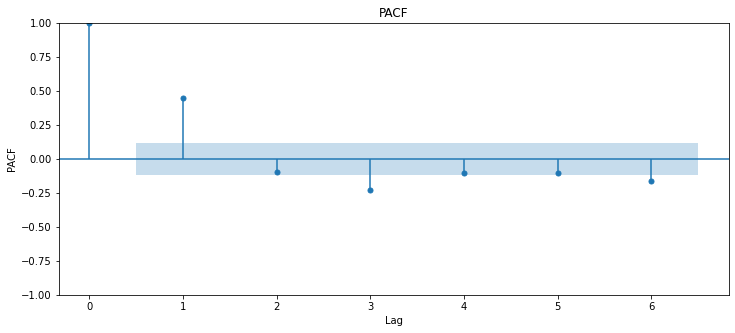

In [72]:
# Plot the seasonal ACF
fig, ax = plt.subplots(figsize=(12,5))
sm.graphics.tsa.plot_acf(df2, lags=6, ax=ax)
ax.set_xlabel('Lag')
ax.set_ylabel('ACF')
ax.set_title('ACF')

# Plot the seasonal PACF
fig, ax = plt.subplots(figsize=(12,5))
sm.graphics.tsa.plot_pacf(df2, lags=6, ax=ax)
ax.set_xlabel('Lag')
ax.set_ylabel('PACF')
ax.set_title('PACF')

plt.show()

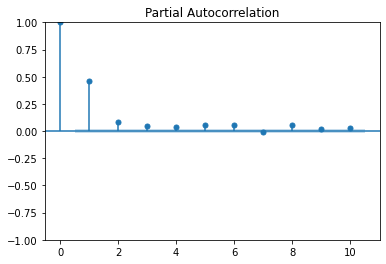

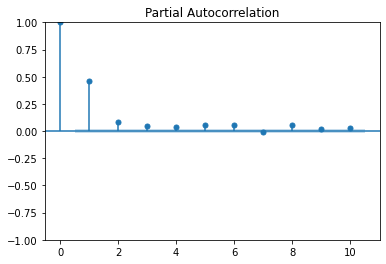

In [39]:
plot_pacf(df1,lags = 10)

# p value is 2

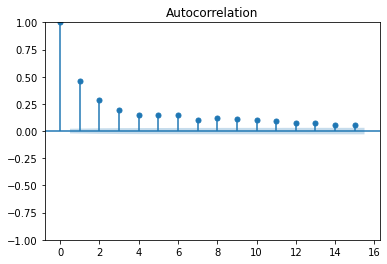

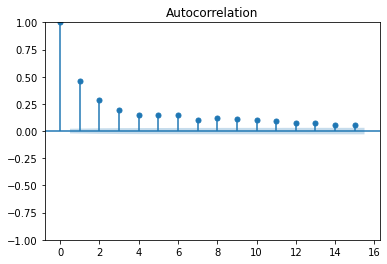

In [40]:
plot_acf(df1,lags = 15)

# q value is 0

# Fitting ARIMA Model

In [186]:
#Dataset used for the model
df2

,RF
Date,
1991-01-31,0.000000
1991-02-28,0.000000
1991-03-31,0.000000
1991-04-30,0.000000
1991-05-31,0.000000
...,...
2013-08-31,2.315404
2013-09-30,0.000000
2013-10-31,0.000000


In [43]:
import statsmodels.api as sm

In [44]:
arima_model = sm.tsa.arima.ARIMA(train, order=(2,0,0))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     RF   No. Observations:                  193
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -555.616
Date:                Sun, 23 Apr 2023   AIC                           1119.232
Time:                        08:20:52   BIC                           1132.283
Sample:                    01-31-1991   HQIC                          1124.517
                         - 01-31-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4619      1.167      2.109      0.035       0.174       4.750
ar.L1          0.4385      0.073      6.036      0.000       0.296       0.581
ar.L2         -0.0436      0.053     -0.829      0.407      -0.147       0.060
sigma2        18.5185      1.970      9.399      0.000      14.657      22.380
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               496.01
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                             2.36
Prob(H) (two-sided):                  0.06   Kurtosis:                         9.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
# Make a forecast for the next 30 days
arima_forecast = arima_result.forecast(steps=120)
arima_forecast

2007-02-28    1.489651
2007-03-31    2.142916
2007-04-30    2.364432
2007-05-31    2.433084
2007-06-30    2.453531
                ...   
2016-09-30    2.461927
2016-10-31    2.461927
2016-11-30    2.461927
2016-12-31    2.461927
2017-01-31    2.461927
Freq: M, Name: predicted_mean, Length: 120, dtype: float64

In [46]:
# Make predictions using the fitted model on the test set
predictions3 = arima_result.predict(start=len(train), end=len(df2)-1)

# Calculate the MAE, MSE, and RMSE on the test set
mae = mean_absolute_error(test, predictions3)
mse = mean_squared_error(test, predictions3)
rmse = np.sqrt(mse)

# Print the results
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)


MAE:  3.039653864262507
MSE:  15.379874217784298
RMSE:  3.921718273637756


# Prediction Plot of ARIMA model

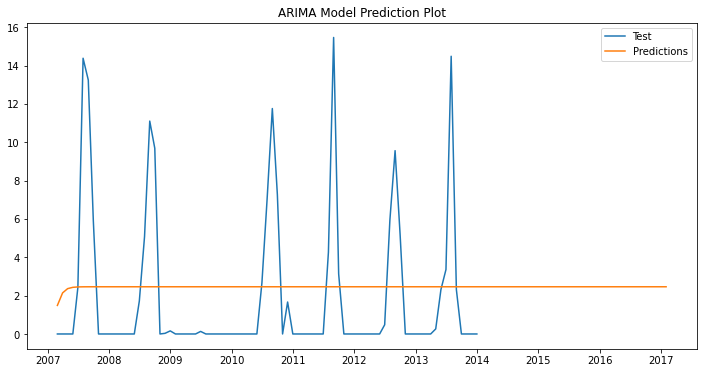

In [50]:
# Plot the actual and predicted values

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test.index, test.values, label='Test')
ax.plot(arima_forecast.index, arima_forecast.values, label='Predictions')
ax.set_title('ARIMA Model Prediction Plot')
ax.legend()
plt.show()

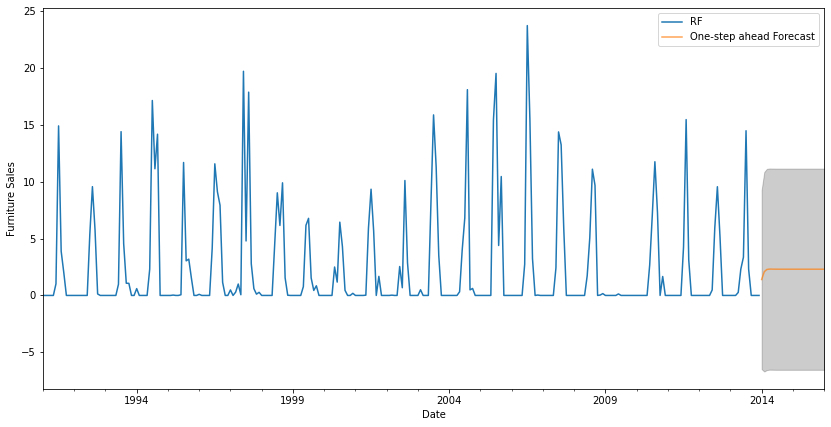

In [53]:
pred = arima_result.get_prediction(start=pd.to_datetime('2014-01-01'),end=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_m['1991':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [81]:
data.drop(['Date'],axis=1)

,predicted_values
Date,
2014-01-01,1.137013
2014-01-02,1.617604
2014-01-03,1.918484
2014-01-04,2.086973
2014-01-05,2.184056
2014-01-06,2.239574
2014-01-07,2.271387
2014-01-08,2.289606
2014-01-09,2.300042


# Plot of Time vs Predicted Values

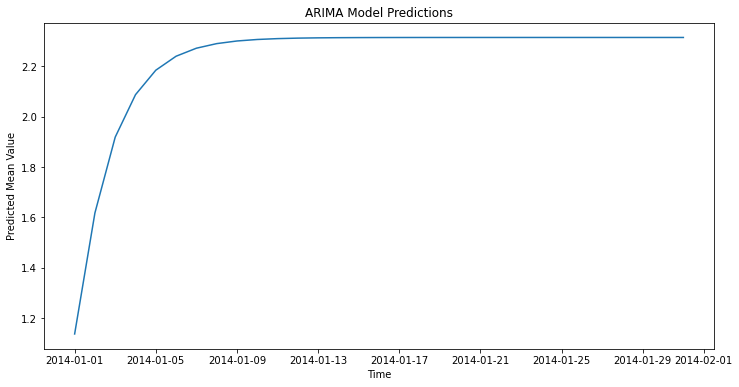

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], pred.values)
plt.xlabel('Time')
plt.ylabel('Predicted Mean Value')
plt.title('ARIMA Model Predictions')
plt.show()

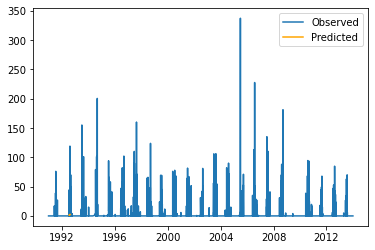

In [96]:
# Plot the original time series data
plt.plot(df2)

# Add the predicted values to the plot
plt.plot(range(len(df2), len(df2)+len(pred)), pred, color='orange')

# Add a legend
plt.legend(['Observed', 'Predicted'])

In [97]:
# Generate out-of-sample forecasts
n_periods = 1826
forecast = result.get_prediction(start=len(df1), end=len(df1) + n_periods - 1, dynamic=False)

# Extract the predicted values and the associated confidence intervals
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

print(predicted_values)
print(confidence_intervals)

8241     1.137013
8242     1.617604
8243     1.918484
8244     2.086973
8245     2.184056
           ...   
10062    2.314032
10063    2.314032
10064    2.314032
10065    2.314032
10066    2.314032
Name: predicted_mean, Length: 1826, dtype: float64
        lower RF   upper RF
8241  -19.203113  21.477139
8242  -20.464851  23.700059
8243  -20.810478  24.647445
8244  -20.840971  25.014918
8245  -20.809570  25.177681
...          ...        ...
10062 -20.711501  25.339565
10063 -20.711501  25.339565
10064 -20.711501  25.339565
10065 -20.711501  25.339565
10066 -20.711501  25.339565

[1826 rows x 2 columns]


In [67]:
output = result.get_prediction(start = pd.to_datetime('1991-12-31'),dynamic = False)
output2 = output.conf_int()
output2

,lower RF,upper RF
Date,,
1991-12-31,-19.203113,21.477139
1992-01-01,-19.203113,21.477139
1992-01-02,-19.203113,21.477139
1992-01-03,-19.203113,21.477139
1992-01-04,-19.203113,21.477139
...,...,...
2013-12-27,-19.203113,21.477139
2013-12-28,-19.203113,21.477139
2013-12-29,-19.203113,21.477139


# Installing Keras and tensorflow for LSTM and GRU Model

In [38]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install tensorflow

In [29]:
df

,Date,MAX,MIN,AW,RF,DRNRF(hrs),DRNRF(mnts)
Date,,,,,,,
1991-01-01,1991-01-01,20.8,5.7,2.0,0.0,0.0,0.0
1991-01-02,1991-01-02,20.2,5.7,3.0,0.0,0.0,0.0
1991-01-03,1991-01-03,19.6,5.9,6.0,0.0,0.0,0.0
1991-01-04,1991-01-04,21.1,7.1,6.0,0.0,0.0,0.0
1991-01-05,1991-01-05,23.6,9.1,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2013-12-27,2013-12-27,35.8,20.6,6.0,0.0,0.0,0.0
2013-12-28,2013-12-28,35.8,20.6,6.0,0.0,0.0,0.0
2013-12-29,2013-12-29,35.8,20.6,6.0,0.0,0.0,0.0


# Fitting LSTM Model

In [52]:
raindata = df_month.drop([])

In [53]:
raindata = monthly_df.drop(['Date'],axis=1)

In [54]:
raindata = monthly_df.set_index(['Date'])

In [55]:
raindata

,MAX,MIN,AW,RF,DRNRF(hrs),DRNRF(mnts)
Date,,,,,,
1991-01-31,26.477419,11.209677,3.548387,0.000000,0.000000,0.000000
1991-02-28,30.221429,14.492857,2.714286,0.000000,0.000000,0.000000
1991-03-31,35.190323,18.651613,2.677419,0.000000,0.000000,0.000000
1991-04-30,37.896667,22.790000,3.700000,0.000000,0.000000,0.000000
1991-05-31,38.883871,25.761290,4.935484,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2013-08-31,33.467244,20.444150,3.627433,2.315404,0.256068,2.213467
2013-09-30,31.379310,25.017241,6.000000,0.000000,0.000000,0.000000
2013-10-31,36.416129,23.070968,6.000000,0.000000,0.000000,0.000000


In [56]:
new_raindata = raindata.reset_index()

In [57]:
new_raindata

,Date,MAX,MIN,AW,RF,DRNRF(hrs),DRNRF(mnts)
0,1991-01-31,26.477419,11.209677,3.548387,0.000000,0.000000,0.000000
1,1991-02-28,30.221429,14.492857,2.714286,0.000000,0.000000,0.000000
2,1991-03-31,35.190323,18.651613,2.677419,0.000000,0.000000,0.000000
3,1991-04-30,37.896667,22.790000,3.700000,0.000000,0.000000,0.000000
4,1991-05-31,38.883871,25.761290,4.935484,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
271,2013-08-31,33.467244,20.444150,3.627433,2.315404,0.256068,2.213467
272,2013-09-30,31.379310,25.017241,6.000000,0.000000,0.000000,0.000000
273,2013-10-31,36.416129,23.070968,6.000000,0.000000,0.000000,0.000000
274,2013-11-30,35.800000,20.600000,6.000000,0.000000,0.000000,0.000000


In [58]:
rainfalldata = new_raindata.set_index(['Date'])

In [59]:
train_dates = pd.to_datetime(new_raindata['Date'])

In [60]:
train_dates

0     1991-01-31
1     1991-02-28
2     1991-03-31
3     1991-04-30
4     1991-05-31
         ...    
271   2013-08-31
272   2013-09-30
273   2013-10-31
274   2013-11-30
275   2013-12-31
Name: Date, Length: 276, dtype: datetime64[ns]

In [61]:
rainfalldata

,MAX,MIN,AW,RF,DRNRF(hrs),DRNRF(mnts)
Date,,,,,,
1991-01-31,26.477419,11.209677,3.548387,0.000000,0.000000,0.000000
1991-02-28,30.221429,14.492857,2.714286,0.000000,0.000000,0.000000
1991-03-31,35.190323,18.651613,2.677419,0.000000,0.000000,0.000000
1991-04-30,37.896667,22.790000,3.700000,0.000000,0.000000,0.000000
1991-05-31,38.883871,25.761290,4.935484,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2013-08-31,33.467244,20.444150,3.627433,2.315404,0.256068,2.213467
2013-09-30,31.379310,25.017241,6.000000,0.000000,0.000000,0.000000
2013-10-31,36.416129,23.070968,6.000000,0.000000,0.000000,0.000000


In [62]:
cols = list(rainfalldata)[3:4]

In [63]:
cols

['RF']

<AxesSubplot:>

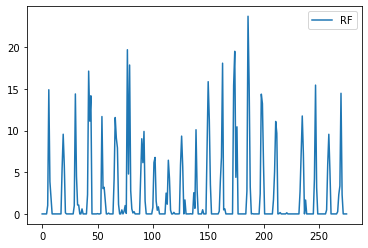

In [64]:
training_df = new_raindata[cols].astype(float)
plot_df = training_df
plot_df.plot.line()

In [65]:
training_df.isna().sum()

RF    0
dtype: int64

In [45]:
len(training_df)

276

In [66]:
new_raindata

,Date,MAX,MIN,AW,RF,DRNRF(hrs),DRNRF(mnts)
0,1991-01-31,26.477419,11.209677,3.548387,0.000000,0.000000,0.000000
1,1991-02-28,30.221429,14.492857,2.714286,0.000000,0.000000,0.000000
2,1991-03-31,35.190323,18.651613,2.677419,0.000000,0.000000,0.000000
3,1991-04-30,37.896667,22.790000,3.700000,0.000000,0.000000,0.000000
4,1991-05-31,38.883871,25.761290,4.935484,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
271,2013-08-31,33.467244,20.444150,3.627433,2.315404,0.256068,2.213467
272,2013-09-30,31.379310,25.017241,6.000000,0.000000,0.000000,0.000000
273,2013-10-31,36.416129,23.070968,6.000000,0.000000,0.000000,0.000000
274,2013-11-30,35.800000,20.600000,6.000000,0.000000,0.000000,0.000000


In [50]:
df1

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
271    2.315404
272    0.000000
273    0.000000
274    0.000000
275    0.000000
Name: RF, Length: 276, dtype: float64

In [67]:
df1 = new_raindata.reset_index()['RF']

In [68]:
df1

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
271    2.315404
272    0.000000
273    0.000000
274    0.000000
275    0.000000
Name: RF, Length: 276, dtype: float64

In [49]:
df1.shape

(276,)

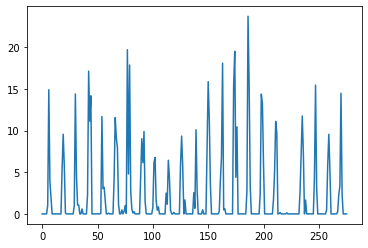

In [141]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [142]:
import numpy as np

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [55]:
print(df1)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [4.31199311e-02]
 [6.28245209e-01]
 [1.63517738e-01]
 [8.48353042e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [2.27266549e-01]
 [4.03153459e-01]
 [2.42988537e-01]
 [5.43699878e-03]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [4.14344615e-02]
 [6.06904988e-01]
 [1.91790132e-01]
 [4.52267682e-02]
 [4.48552399e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [2.52820443e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [9.75635603e-02]
 [7.22381745e-01]
 [4.69348919e-01]
 [5.97498981e-01]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.35924969e-03]
 [0.00000000e+00]
 [0.00000000e+00]
 [2.52820443e-03]
 [4.92636616e-01]
 [1.281772

In [56]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [57]:
training_size,test_size

(179, 97)

In [58]:
import numpy as np
def create_dataset(dataset,time_step=1):
    dataX, dataY = [] , []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX),np.array(dataY)

In [59]:
time_step = 70
X_train , y_train = create_dataset(train_data ,time_step)
X_test , y_test = create_dataset(test_data , time_step)

In [60]:
print(X_train.shape)

(108, 70)


In [61]:
print(X_train.shape) , print(y_train.shape)

(108, 70)
(108,)


(None, None)

In [62]:
print(X_test.shape) , print(y_test.shape)

(26, 70)
(26,)


(None, None)

In [63]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] ,1)

In [65]:
X_train

array([[[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.38412396],
        [0.33428481],
        [0.04838929]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.33428481],
        [0.04838929],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.04838929],
        [0.        ],
        [0.        ]],

       ...,

       [[0.03574827],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.65031036],
        [0.82275384]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.65031036],
        [0.82275384],
        [0.18512981]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.82275384],
        [0.18512981],
        [0.44060985]]])

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [154]:
model = Sequential()
model.add(LSTM(50,activation = 'tanh',return_sequences=True,input_shape=(70,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer = 'adam')

In [155]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 70, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 70, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [156]:
lstm_model = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 50,batch_size = 12,validation_split=0.2,verbose=1)

Epoch 1/50
9/9 [==============================] - 4s 127ms/step - loss: 0.0410 - val_loss: 0.0227
Epoch 2/50
9/9 [==============================] - 0s 30ms/step - loss: 0.0391 - val_loss: 0.0213
Epoch 3/50
9/9 [==============================] - 0s 30ms/step - loss: 0.0389 - val_loss: 0.0228
Epoch 4/50
9/9 [==============================] - 0s 31ms/step - loss: 0.0382 - val_loss: 0.0220
Epoch 5/50
9/9 [==============================] - 0s 30ms/step - loss: 0.0380 - val_loss: 0.0218
Epoch 6/50
9/9 [==============================] - 0s 31ms/step - loss: 0.0395 - val_loss: 0.0214
Epoch 7/50
9/9 [==============================] - 0s 31ms/step - loss: 0.0384 - val_loss: 0.0201
Epoch 8/50
9/9 [==============================] - 0s 29ms/step - loss: 0.0371 - val_loss: 0.0214
Epoch 9/50
9/9 [==============================] - 0s 32ms/step - loss: 0.0354 - val_loss: 0.0205
Epoch 10/50
9/9 [==============================] - 0s 32ms/step - loss: 0.0344 - val_loss: 0.0201
Epoch 11/50
9/9 [===========

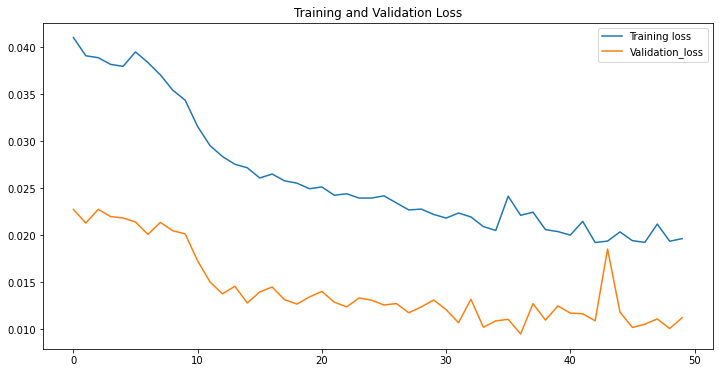

In [157]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(lstm_model.history['loss'],label = 'Training loss')
ax.plot(lstm_model.history['val_loss'],label = 'Validation_loss')
ax.set_title('Training and Validation Loss')
ax.legend()

In [89]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 30ms/step


In [90]:
true_predictions = scaler.inverse_transform(test_predict)

In [91]:
# Create a date range for the next 26 months
future_dates = pd.date_range(start='2013-12-31', periods=26, freq='MS')
future_dates

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01'],
              dtype='datetime64[ns]', freq='MS')

In [102]:
true_predictions

array([[ 1.8221971 ],
       [-0.2087921 ],
       [-0.70450187],
       [-0.7124256 ],
       [-0.7272076 ],
       [-0.7311831 ],
       [-0.24914266],
       [ 1.5292127 ],
       [ 5.0178866 ],
       [ 8.703043  ],
       [ 9.354165  ],
       [ 5.9052887 ],
       [ 1.7433301 ],
       [-0.32753167],
       [-0.814189  ],
       [-0.8096292 ],
       [-0.80991673],
       [-0.79023093],
       [-0.27309144],
       [ 1.5342607 ],
       [ 4.9802523 ],
       [ 8.360613  ],
       [ 8.422089  ],
       [ 4.821728  ],
       [ 1.4344586 ],
       [-0.07452607]], dtype=float32)

In [103]:
future_values = pd.DataFrame({'RF': true_predictions.flatten()}, index=future_dates)
future_values

,RF
2014-01-01,1.822197
2014-02-01,-0.208792
2014-03-01,-0.704502
2014-04-01,-0.712426
2014-05-01,-0.727208
2014-06-01,-0.731183
2014-07-01,-0.249143
2014-08-01,1.529213
2014-09-01,5.017887
2014-10-01,8.703043


In [104]:
# Replace negative values with zero
future_values = future_values.clip(lower=0)

In [105]:
all_data = pd.concat([df2,future_values],axis=0)

# Forecasted Plot

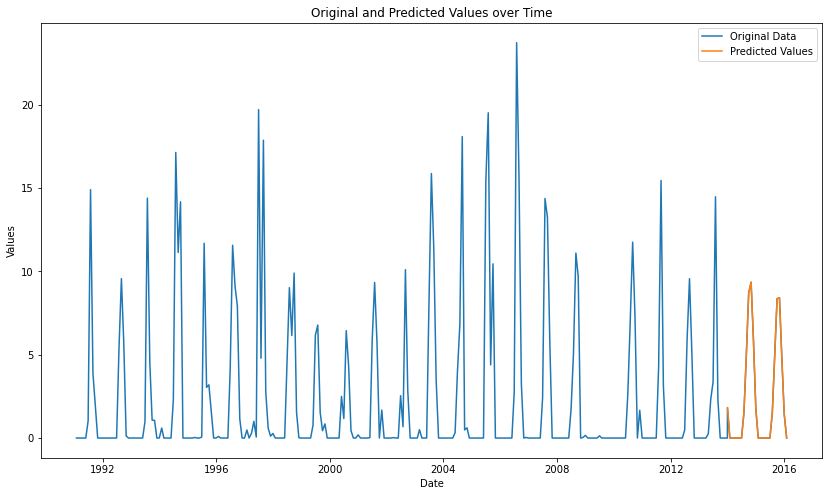

In [106]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the original data
ax.plot(all_data.index, all_data['RF'], label='Original Data')

# Plot the predicted values
ax.plot(future_values.index, future_values['RF'], label='Predicted Values')

# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.set_title('Original and Predicted Values over Time')

# Add a legend
ax.legend()

# Show the plot
plt.show()

# Performance Evaluation Metrics 

In [221]:
## calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

# calculate MAE
mae = mean_absolute_error(y_test, test_predict)
print('MAE:', mae)

# calculate MSE
mse = mean_squared_error(y_test, test_predict)
print('MSE:', mse)

### Test Data RMSE
RMSE = math.sqrt(mean_squared_error(y_test,test_predict))
print('RMSE:',RMSE)

MAE: 0.06049455215778048
MSE: 0.008920254839533
RMSE: 0.09444710074710075


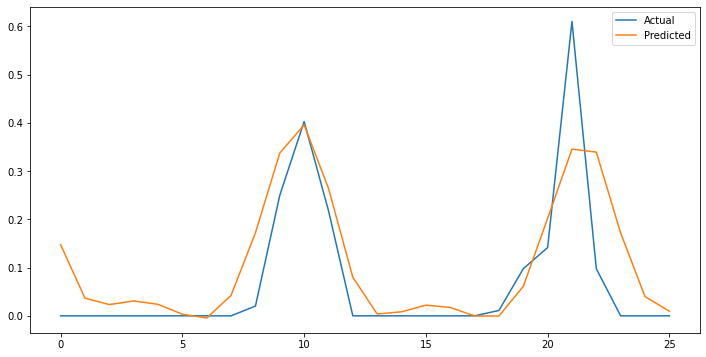

In [190]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test, label='Actual')
ax.plot(test_predict, label='Predicted')
ax.legend()
plt.show()

# Trying with different hyperparameters

In [134]:
model_l1 = Sequential()
model_l1.add(LSTM(50,activation = 'tanh',return_sequences=True,input_shape=(70,1)))
model_l1.add(LSTM(50,return_sequences=True))
model_l1.add(LSTM(50))
model_l1.add(Dense(1))
model_l1.compile(loss='mean_squared_error',optimizer = 'adam')

In [135]:
lstm_model_l1 = model_l1.fit(X_train,y_train,# Evaluate the model on the test dataset
mse = model.evaluate(test)
print('Mean Squared Error:', mse))

Epoch 1/50
9/9 [==============================] - 6s 209ms/step - loss: 0.0414 - val_loss: 0.0227
Epoch 2/50
9/9 [==============================] - 1s 59ms/step - loss: 0.0392 - val_loss: 0.0220
Epoch 3/50
9/9 [==============================] - 1s 63ms/step - loss: 0.0386 - val_loss: 0.0221
Epoch 4/50
9/9 [==============================] - 1s 61ms/step - loss: 0.0401 - val_loss: 0.0205
Epoch 5/50
9/9 [==============================] - 1s 58ms/step - loss: 0.0373 - val_loss: 0.0228
Epoch 6/50
9/9 [==============================] - 1s 61ms/step - loss: 0.0365 - val_loss: 0.0201
Epoch 7/50
9/9 [==============================] - 1s 63ms/step - loss: 0.0346 - val_loss: 0.0192
Epoch 8/50
9/9 [==============================] - 1s 59ms/step - loss: 0.0322 - val_loss: 0.0193
Epoch 9/50
9/9 [==============================] - 0s 51ms/step - loss: 0.0292 - val_loss: 0.0150
Epoch 10/50
9/9 [==============================] - 1s 57ms/step - loss: 0.0287 - val_loss: 0.0127
Epoch 11/50
9/9 [===========

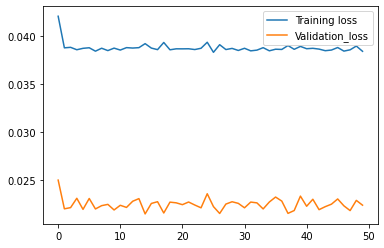

In [133]:
plt.plot(lstm_model_l1.history['loss'],label = 'Training loss')
plt.plot(lstm_model_l1.history['val_loss'],label = 'Validation_loss')
plt.legend()

In [38]:
test

,RF
Date,
2007-02-28,0.000000
2007-03-31,0.000000
2007-04-30,0.000000
2007-05-31,0.000000
2007-06-30,2.426667
...,...
2013-08-31,2.315404
2013-09-30,0.000000
2013-10-31,0.000000


# Double Exponential Model

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [44]:
# Fit the model with double exponential smoothing
expo_model = ExponentialSmoothing(train, trend='add', seasonal=None).fit()

In [41]:
expo_model.summary()

Dep. Variable:,RF,No. Observations:,193
Model:,ExponentialSmoothing,SSE,4620.664
Optimized:,True,AIC,620.891
Trend:,Additive,BIC,633.942
Seasonal:,None,AICC,621.343
Seasonal Periods:,None,Date:,"Tue, 25 Apr 2023"
Box-Cox:,False,Time:,13:12:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6424581,alpha,True
smoothing_trend,0.000000,beta,True


In [204]:
# Make predictions for the test set
expo_predictions = expo_model.predict(start=test.index[0], end=test.index[-1])

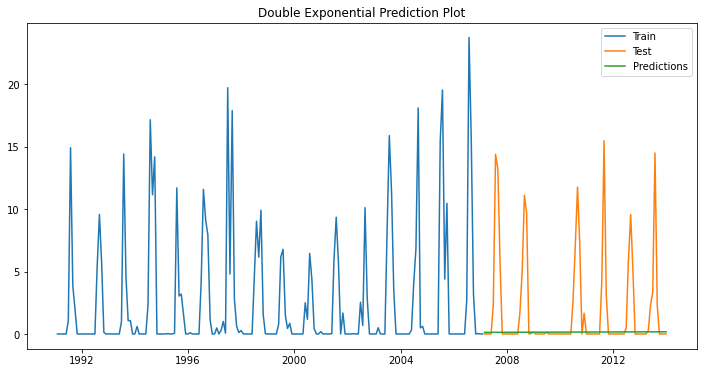

In [205]:
# Plot the actual and predicted values
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(train.index, train.values, label='Train')
ax.plot(test.index, test.values, label='Test')
ax.plot(expo_predictions.index, expo_predictions.values, label='Predictions')
ax.set_title('Double Exponential Prediction Plot')
ax.legend()
plt.show()

In [206]:
## Calculate the accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, expo_predictions)
mse = mean_squared_error(test, expo_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - expo_predictions) / test)) * 100

# Print the accuracy metrics
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape.values[0]:.2f}%')

MAE: 1.99
MSE: 18.38
RMSE: 4.29
MAPE: nan%


# Triple Exponential Smoothing (Holt Winters Methods)

In [39]:
train

,RF
Date,
1991-01-31,0.000000
1991-02-28,0.000000
1991-03-31,0.000000
1991-04-30,0.000000
1991-05-31,0.000000
...,...
2006-09-30,3.233333
2006-10-31,0.000000
2006-11-30,0.033333


In [50]:
# Fit the model with triple exponential smoothing
texpo_model = ExponentialSmoothing(train, seasonal_periods=12, seasonal='add').fit()

In [46]:
texpo_model.summary()

Dep. Variable:,RF,No. Observations:,193
Model:,ExponentialSmoothing,SSE,1709.866
Optimized:,True,AIC,449.026
Trend:,None,BIC,494.703
Seasonal:,Additive,AICC,452.117
Seasonal Periods:,12,Date:,"Tue, 25 Apr 2023"
Box-Cox:,False,Time:,13:13:35
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
smoothing_seasonal,0.000000,gamma,True


In [198]:
# Make predictions for the test set
texpo_predictions = texpo_model.predict(start=test.index[0], end=test.index[-1])

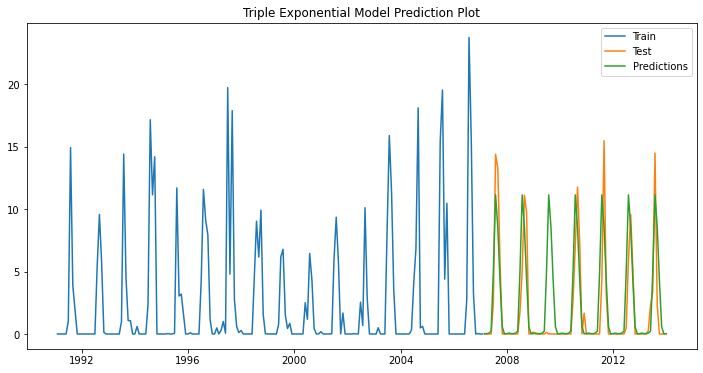

In [199]:
# Plot the actual and predicted values

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(train.index, train.values, label='Train')
ax.plot(test.index, test.values, label='Test')
ax.plot(texpo_predictions.index, texpo_predictions.values, label='Predictions')
ax.set_title('Triple Exponential Model Prediction Plot')
ax.legend()
plt.show()

In [200]:
## Calculate the accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, texpo_predictions)
mse = mean_squared_error(test, texpo_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - texpo_predictions) / test)) * 100

# Print the accuracy metrics
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape.values[0]:.2f}%')

MAE: 1.55
MSE: 7.88
RMSE: 2.81
MAPE: nan%


# Define the GRU network architecture

In [183]:
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(70, 1)))  # 64 units, input sequence of length 10, and one feature per time step
gru_model.add(Dense(1, activation='relu'))
gru_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 50)                7950      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8,001
Trainable params: 8,001
Non-trainable params: 0
_________________________________________________________________


In [184]:
# Compile the model with mean squared error loss and Adam optimizer
gru_model.compile(loss='mse', optimizer='adam')

In [185]:
# Train the model
gru_model_fit = gru_model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 50,batch_size = 12,validation_split=0.2,verbose=1)

Epoch 1/50
9/9 [==============================] - 2s 52ms/step - loss: 0.0465 - val_loss: 0.0230
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0387 - val_loss: 0.0240
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0373 - val_loss: 0.0214
Epoch 4/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0358 - val_loss: 0.0187
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0339 - val_loss: 0.0189
Epoch 6/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0325 - val_loss: 0.0196
Epoch 7/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0307 - val_loss: 0.0168
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0298 - val_loss: 0.0167
Epoch 9/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0281 - val_loss: 0.0150
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0279 - val_loss: 0.0167
Epoch 11/50
9/9 [============

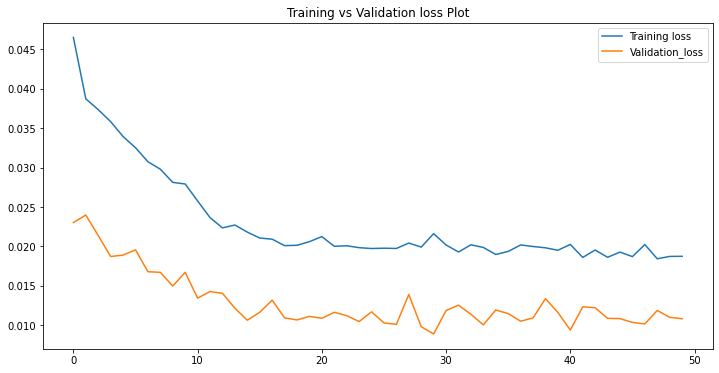

In [186]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(gru_model_fit.history['loss'],label = 'Training loss')
ax.plot(gru_model_fit.history['val_loss'],label = 'Validation_loss')
ax.set_title('Training vs Validation loss Plot')
ax.legend()

In [187]:
gtrain_predict = gru_model.predict(X_train)
gtest_predict = gru_model.predict(X_test)

1/1 [==============================] - 0s 16ms/step


In [188]:
gru_true_predicted = scaler.inverse_transform(gtest_predict)

In [189]:
gru_future_values = pd.DataFrame({'RF': gru_true_predicted.flatten()}, index=future_dates)
gru_future_values

,RF
2014-01-01,3.124284
2014-02-01,0.000000
2014-03-01,0.000000
2014-04-01,0.000000
2014-05-01,0.000000
2014-06-01,0.000000
2014-07-01,0.000000
2014-08-01,0.810850
2014-09-01,4.879358
2014-10-01,7.301624


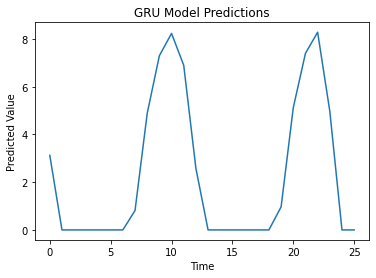

In [190]:
# Plot the predicted values
plt.plot(gru_true_predicted)
plt.xlabel('Time')
plt.ylabel('Predicted Value')
plt.title('GRU Model Predictions')
plt.show()

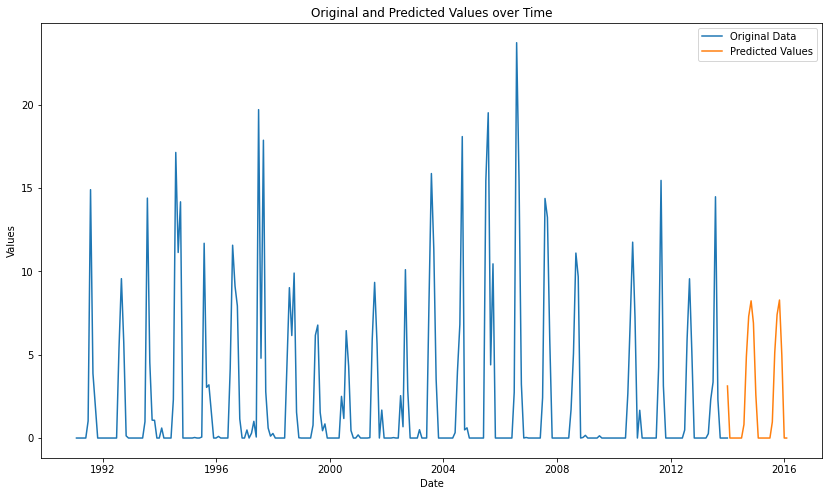

In [191]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the original data
ax.plot(df2.index, df2['RF'], label='Original Data')

# Plot the predicted values
ax.plot(gru_future_values.index, gru_future_values['RF'], label='Predicted Values')

# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.set_title('Original and Predicted Values over Time')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [192]:
# Evaluate the model on the test dataset
gru_mse = gru_model.evaluate(X_test,y_test)
print('Mean Squared Error:', gru_mse)

1/1 [==============================] - 0s 24ms/step - loss: 0.0108
Mean Squared Error: 0.010831696912646294


# Forecasted Plot of GRU model

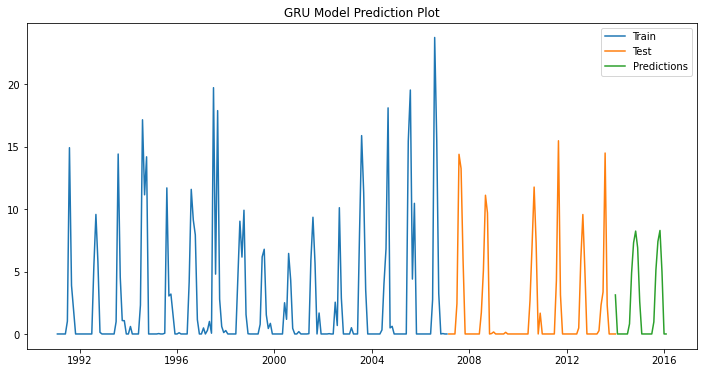

In [193]:
# Plot the actual and predicted values

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(train.index, train.values, label='Train')
ax.plot(test.index, test.values, label='Test')
ax.plot(gru_future_values.index, gru_future_values.values, label='Predictions')
ax.set_title('GRU Model Prediction Plot')
ax.legend()
plt.show()

In [194]:
gru_future_values

,RF
2014-01-01,3.124284
2014-02-01,0.000000
2014-03-01,0.000000
2014-04-01,0.000000
2014-05-01,0.000000
2014-06-01,0.000000
2014-07-01,0.000000
2014-08-01,0.810850
2014-09-01,4.879358
2014-10-01,7.301624


# Performance of Evaluation Metrics

In [195]:
## calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

# calculate MAE
mae = mean_absolute_error(y_test, gtest_predict)
print('MAE:', mae)

# calculate MSE
mse = mean_squared_error(y_test, gtest_predict)
print('MSE:', mse)

### Test Data RMSE
RMSE = math.sqrt(mean_squared_error(y_test,gtest_predict))
print('RMSE:',RMSE)

MAE: 0.05955202917550178
MSE: 0.010831696762210049
RMSE: 0.10407543784298988


# Conclusion

The existing methods for rainfall forecasting fail in the most complicated situations because they cannot forecast the hidden patterns present, which are yet to be understood to perform an accurate prediction. There are other existing factors that causes in the accurate rainfall prediction. Here we use various approaches like some statistical models and recurrent neural networks.

| Models             | MAE   | MSE    | RMSE   |
|--------------------|-------|--------|--------|
| Auto ARIMA         | 3.9205| 29.99  | 5.4766 |
| ARIMA              | 3.0396| 15.3798| 3.9217 |
| Auto SARIMA        | 1.4995| 5.6504 | 2.3770 |
| SARIMA             | 1.6604| 10.3901| 3.2233 |
| LSTM               | 0.0604| 0.0089 | 0.0944 |
| GRU                | 0.0500| 0.0100 | 0.1040 |
| Double Exponential | 1.9900| 18.38  | 4.2900 |
| Triple Exponential | 1.5500| 7.88   | 2.8100 |

Our rainfall data has monthly seasonal pattern. We need different time series models to capture this seasonality. As from the above table, Auto ARIMA and ARIMA model does not capture the seasonality from the data. While Seasonal ARIMA model take this seasonality into account for future prediction.
Other than that exponential models take prediction as weighted averages of past observation. As mean squared error value of Triple Exponential model   is very less than double exponential model.   Because Triple Exponential model works better, when there is a sudden changes  in the seasonality.
Over all on the basis of above accuracy table, LSTM is the best model for predicting the rainfall. Because it has very less Mean Squared Value of 0.0089. Overall, the ability of LSTMs to capture long-term dependencies and handle variable-length input sequences makes them a good choice for predicting rainfall. It proves that more complex methods are sometimes   better than a simple   methods.
